### Chapter 10

# **CNN(Convolutional Neural Network) : 합성곱 모델 MNIST**

> ## 학습 목표
-   **CNN의 기본 개념 이해** : 합성곱 신경망(CNN)의 기본 원리와 구조를 이해하고, CNN이 이미지 데이터 처리에 효과적인 이유를 설명할 수 있다.
    
-   **합성곱 연산 및 필터 이해** : 합성곱 연산의 정의를 이해하고, 필터(커널)의 역할 및 작동 방식을 설명하며, 필터의 크기, 스트라이드, 패딩이 결과에 미치는 영향을 분석할 수 있다.
    
-   **CNN 아키텍처 구성 요소 이해** : CNN의 기본 구성 요소(합성곱 레이어, 풀링 레이어, 활성화 함수 등)의 역할을 이해하고, 이들이 합쳐져서 어떻게 특성 추출을 수행하는지를 설명할 수 있다.
    
-   **MNIST 데이터셋 처리 및 구현** : MNIST 데이터셋을 로드하고 전처리하는 방법을 이해하며, 파이토치를 사용하여 CNN 모델을 구현하는 능력을 배양할 수 있다.
    
-   **모델 훈련 및 성능 평가** : CNN 모델을 MNIST 데이터셋에 대해 훈련시키고, 다양한 성능 지표(정확도, 손실 값 등)를 활용하여 모델 성능을 평가하고 분석할 수 있다.
    
-   **하이퍼파라미터 조정** : CNN 모델 성능을 향상하기 위한 하이퍼파라미터 조정 기법(예: 레이어 수, 필터 수, 학습률 등)을 이해하고, 이를 통해 최적의 모델을 구하는 과정의 중요성을 인식할 수 있다.
    
-   **오버피팅 방지 및 일반화** : 오버피팅을 방지하기 위한 기술(예: 정규화, 드롭아웃 등)을 이해하고, CNN 모델이 새로운 데이터에 대해 일반화되도록 설계하는 방법을 배울 수 있다.

## **10.1 CNN 개념**

> #### **CNN은 이미지 인식의 딥러닝 모델**입니다.
- 데이터 처리 및 전처리 (Data Handling and Preprocessing)

- **데이터셋(Dataset) 클래스 이해하기** : PyTorch의 torch.utils.data.Dataset 클래스를 사용하여 커스텀 데이터셋을 만드는 방법 이해하기

- **데이터 로더**(DataLoader) : torch.utils.data.DataLoader를 이용해 배치(batch) 단위로 데이터를 로드하고, 학습 과정에서 데이터를 효율적으로 사용하는 방법 이해하기

- **데이터 전처리**(Transformations) : 이미지나 텍스트 데이터의 전처리를 위해 torchvision.transforms를 사용하는 방법 이해하기

- **합성곱 계층**(Convolutional Layer): 이미지나 시계열 데이터를 처리할 때 특징을 자동으로 추출합니다. 

   이미지에서 물체의 가장자리, 색상, 질감 등의 특징을 학습합니다.
- **풀링 계층**(Pooling Layer): 데이터의 크기를 줄여서 계산을 효율적으로 만들고, 중요한 특징을 추출합니다.
- **완전 연결 계층**(Fully Connected Layer): 추출된 특징을 기반으로 최종 출력을 예측합니다.
- **CNN은 특히 이미지 분류, 객체 인식, 영상 분석 등과 같은 시각적 문제를 다루는 데 뛰어난 성능**을 보입니다.

### 10.1.1 CNN의 기본 개념

-   **합성곱 신경망(CNN)**: 이미지 인식 및 분류에 주로 사용되는 신경망 구조로, 픽셀 간의 공간적 관계를 고려하여 에지, 형태, 패턴 등의 특성을 추출하는 데 뛰어난 성능을 발휘합니다.
-   **합성곱 연산**: 입력 이미지에 필터(또는 커널)를 적용하여 특징 맵을 생성하는 과정입니다. 필터는 이미지에서 특정 특징을 추출합니다.
-   **활성화 함수**: 비선형성을 도입하여 모델의 표현력을 높이는 함수로, 일반적으로 ReLU(ReLU6) 또는 Sigmoid 등이 사용됩니다.
-   **풀링 레이어**: 특징 맵을 다운샘플링하여 계산량을 줄이고, 주요 특징을 유지하는 역할을 합니다. 일반적으로 Max Pooling이 많이 사용됩니다.

### 10.1.2 MNIST 데이터셋
- 인공지능 연구의 권위자 Yann LeCun 교수가 만든 학습용 문제 (Convolutional Neural Networks(CNN, 합성곱 신경망)의 창시자)
-   **MNIST(Modified National Institute of Standards and Technology)란 : 손으로 쓴 숫자(0~9)의 이미지 데이터셋으로, 28x28픽셀(입력층 뉴런 784개, 출력층 뉴런, 10개)의 그레이스케일 타입의 이미지로 구성되어 있습니다. 총 70,000개의 샘플로, 학습용 데이터 60,000개, 테스트용 데이터 10,000개가 있습니다.
-   **데이터 전처리**: MNIST 데이터셋을 사용할 때, 이미지를 정규화(0~1 사이로 조정), 리사이즈(필요 시), 텐서로 변환하는 등의 전처리 과정을 포함합니다.

### 10.1.3 CNN 구조와 구성요소

-   **입력 레이어**: MNIST 데이터의 각 이미지를 입력하는 레이어입니다.
-   **합성곱 레이어**: 필터를 사용하여 이미지에서 특징 맵을 생성합니다.
-   **풀링 레이어**: 특징 맵의 크기를 줄이고, 가장 중요한 정보를 유지합니다.
-   **드롭아웃 레이어**: 과적합을 방지하기 위해 랜덤으로 뉴런을 비활성화하는 레이어입니다.
-   **완전 연결 레이어(FC)**: 최종 클래스 확률을 예측하기 위해 모든 뉴런이 연결된 레이어입니다.
-   **출력 레이어**: 10개의 뉴런(0~9 숫자)에 대한 확률을 출력하는 레이어입니다.

### 10.1.4 파이토치를 이용한 CNN 구현 예시

#### 1) 필요한 라이브러리 임포트

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import torch.nn.functional as F

- torch: 파이토치의 핵심 라이브러리입니다. (torch 2.4.0, torchvision 0.19.0 사용)
- torch.nn: 신경망 구축에 필요한 모듈을 제공합니다.
- torch.optim: 다양한 옵티마이저(모델의 가중치를 업데이트하는 알고리즘)를 제공합니다.
- torchvision: 데이터셋 로딩 및 변환에 유용한 라이브러리입니다.
- torch.nn.functional: 다양한 신경망 함수(예: 활성화 함수, 풀링 등)를 제공합니다.

#### 2) CNN 모델 클래스 정의

In [2]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.5)

`SimpleCNN`: CNN 모델 클래스를 정의합니다. `nn.Module`을 상속받아야 하며, 모델의 층을 정의하는 `__init__` 메소드를 포함합니다.

-   `self.conv1`: 첫 번째 합성곱 층. 입력 채널 1(흑백 이미지), 출력 채널 32. 커널 사이즈는 3x3.
-   `self.pool`: 풀링 층. 2x2 크기로 다운샘플링.
-   `self.conv2`: 두 번째 합성곱 층. 입력 채널 32, 출력 채널 64.
-   `self.fc1`: 첫 번째 완전 연결 층(FC). 입력 차원은 `64 * 7 * 7`, 출력 차원은 128.
-   `self.fc2`: 두 번째 완전 연결 층(FC). 출력 차원은 10으로, 각 뉴런이 0~9 숫자에 해당합니다.
-   `self.dropout`: 드롭아웃 층으로, 과적합 방지를 위해 일정 확률(50%)로 뉴런을 비활성화 합니다.

#### 3) 순전파(Forward pass) 메소드 정의

In [3]:
def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

`forward`: 입력 데이터가 모델을 통과하며 처리되는 과정을 정의합니다.

-   `self.conv1(x)`: 입력 `x`에 첫 번째 합성곱 층을 적용.
-   `F.relu`: 활성화 함수(ReLU)를 통해 비선형성을 도입.
-   `self.pool`: 풀링을 통해 특성 맵의 크기를 줄임.
-   `x.view(-1, 64 * 7 * 7)`: 1차원으로 변환하여 완전 연결 층에 입력 가능하게 만듭니다.
-   마지막 두 줄은 첫 번째 완전 연결 층을 거치고 드롭아웃을 적용한 후 두 번째 완전 연결 층을 거침.

#### 4) 데이터셋 로드 및 전처리

In [4]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST('.', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

-   `transforms`: 데이터 전처리를 정의합니다. 데이터를 텐서로 변환하고 정규화.
-   `datasets.MNIST`: MNIST 데이터셋을 로드합니다.
-   `DataLoader`: 데이터셋을 배치로 나누어 훈련할 수 있게 해줍니다. 여기서 `batch_size=64`는 한 번에 64개의 샘플을 사용하며, `shuffle=True`는 데이터를 무작위로 섞습니다.

#### 5) 모델, 손실 함수 및 옵티마이저 정의

In [8]:
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

-   모델 인스턴스를 생성합니다.
-   `criterion`: 손실 함수로는 교차 엔트로피 손실 사용.
-   `optimizer`: Adam 옵티마이저를 사용하여 모델의 가중치를 업데이트합니다.

#### 6) 모델 훈련

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim

# ... (데이터 로더 및 기타 설정)

# 모델, 손실 함수, 옵티마이저 정의
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # 여기에 합성곱 계층, 활성화 함수 등을 추가합니다.
        # 예시:
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2)
        self.fc = nn.Linear(16 * 14 * 14, 10)  # 출력 크기에 맞게 조정

    def forward(self, x):
        # 여기에 순전파 연산을 정의합니다.
        # 예시:
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)  # 완전히 연결된 계층을 위한 크기 조정
        x = self.fc(x)
        return x

model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 학습 루프
for epoch in range(5):  # 에포크 수

    for images, labels in train_loader:

        optimizer.zero_grad()  # 기울기 초기화

        outputs = model(images)  # 순전파

        loss = criterion(outputs, labels)  # 손실 계산

        loss.backward()  # 역전파

        optimizer.step()  # 가중치 업데이트

    print(f'Epoch [{epoch+1}/5], Loss: {loss.item():.4f}')


Epoch [1/5], Loss: 0.0961
Epoch [2/5], Loss: 0.0312
Epoch [3/5], Loss: 0.0656
Epoch [4/5], Loss: 0.0543
Epoch [5/5], Loss: 0.0670


-   `for epoch in range(5)`: 5 에포크 동안 학습을 수행합니다.
-   각 배치에서:
    
    -   `optimizer.zero_grad()`: 기울기를 초기화합니다.
    -   `model(images)`: 순전파를 통해 예측값을 얻습니다.
    -   `criterion(outputs, labels)`: 손실을 계산합니다.
    -   `loss.backward()`: 역전파를 통해 기울기를 계산합니다.
    -   `optimizer.step()`: 가중치를 업데이트합니다.
    
-   마지막으로 에포크마다 손실 값을 출력합니다.

#### `전체 소스`

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import torch.nn.functional as F

# CNN 모델 클래스 정의
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) #'F'를 사용할 수 있도록 import 추가
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# 데이터셋 로드 및 전처리
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST('.', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

# 모델, 손실 함수 및 옵티마이저 정의
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 모델 훈련
for epoch in range(5):  # 에포크 수
    for images, labels in train_loader:
        optimizer.zero_grad()  # 기울기 초기화
        outputs = model(images)  # 순전파
        loss = criterion(outputs, labels)  # 손실 계산
        loss.backward()  # 역전파
        optimizer.step()  # 가중치 업데이트

    print(f'Epoch [{epoch+1}/5], Loss: {loss.item():.4f}')

Epoch [1/5], Loss: 0.0953
Epoch [2/5], Loss: 0.0474
Epoch [3/5], Loss: 0.0455
Epoch [4/5], Loss: 0.0377
Epoch [5/5], Loss: 0.1607


#### 에포크 손실 해석

1.  **Epoch \[1/5\], Loss: 0.0351**: 첫 번째 에포크에서 손실이 0.0351로 시작했으며, 모델이 초기적으로 잘 적합하고 있다는 신호입니다.
    
2.  **Epoch \[2/5\], Loss: 0.0648**: 두 번째 에포크에서 손실이 증가해 0.0648이 되었습니다. 이는 모델이 학습 도중 일시적으로 변동성을 보이고 있음을 나타냅니다.
    
3.  **Epoch \[3/5\], Loss: 0.0187**: 세 번째 에포크에서 손실이 크게 감소하여 0.0187로 나타났습니다. 모델이 효과적으로 학습하고 있음을 보여줍니다.
    
4.  **Epoch \[4/5\], Loss: 0.0079**: 네 번째 에포크에서 손실은 0.0079로 매우 낮아졌으며, 모델이 훈련 데이터에 대해 매우 잘 적합하고 있다는 것을 나타냅니다.
    
5.  **Epoch \[5/5\], Loss: 0.1285**: 마지막 다섯 번째 에포크에서 손실이 0.1285로 크게 증가했습니다. 이는 모델이 과적합되고 있거나 학습이 불안정해졌음을 시사합니다.
    

※ 전반적으로 모델은 3, 4 에포크 동안 매우 잘 학습되었으나, 마지막 에포크에서 손실이 급격히 증가하여 과적합의 위험이 있음을 나타냅니다. 

필요한 경우 정규화 기법이나 드롭아웃을 적용하여 과적합을 방지하는 방안을 고려할 수 있습니다.

### 5\. 모델 평가 및 성능 지표

-   **정확도(Accuracy)**: 모델의 예측이 실제 정답과 일치하는 비율로, MNIST에서는 높은 정확도가 기대됩니다.
-   **혼돈 행렬(Confusion Matrix)**: 각 클래스에 대한 True Positive, False Positive, False Negative 등을 시각적으로 보여 주어 모델 성능을 평가할 수 있습니다.

※ 학습 예시는 CNN의 구조와 동작 방식에 대한 이해를 높이기 위해 구분 설명하였습니다. 이 과정을 통해 기본적인 CNN을 통해 MNIST 데이터셋을 분류하는 단계부터 각 단계를 명확하게 설명하였고 응용 프로그램으로 손글씨 숫자 MNIST 모델을 구현해보겠습니다.

## **10.2 손글씨 숫자 MNIST**

- 손글씨 숫자 데이터셋인 MNIST를 사용하여 딥러닝 모델을 구현합니다. 
- 이 데이터셋은 다양한 딥러닝 프레임워크에서 쉽게 접근할 수 있어 학습용으로 많이 쓰입니다. 
- **훈련 이미지 세트 60,000개, 테스트 세트 10,000개, 이미지 크기 28x28 픽셀의 회색조 이미지, 클래스 수 0~9까지의 총 10개 숫자 클래스**

#### **TensorFlow와 Keras를 사용하여 간단한 Convolutional Neural Network (CNN) 모델을 구현하는 방법으로 손글씨 숫자 MNIST를 학습합니다.**

- **데이터 로드 및 전처리** : MNIST 데이터셋을 불러오고, 이미지를 모델에 입력하기 적합한 형태로 변환합니다.

- **모델 구성** : CNN 모델을 설계합니다.

- **모델 컴파일** : 손실 함수, 옵티마이저, 평가 지표를 지정합니다.

- **모델 학습** : 훈련 데이터셋을 사용하여 모델을 학습시킵니다.

- **모델 평가 및 예측** : 테스트 데이터셋으로 모델 성능을 평가합니다.

※ Keras : https://keras.io/about/  머신러닝/딥러닝 플랫폼인 "텐서플로우"에서 실행되는 파이썬 API

> ## MNIST(Modified National Institute of Standards and Technology)

##### **1) 모듈 불러오기**

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
# from torch.autograd import Variable

from matplotlib import pyplot as plt
%matplotlib inline

1.  **PyTorch 및 관련 모듈 임포트**: `torch`, `torch.nn`, `torch.optim` 등 다양한 PyTorch 모듈을 가져옵니다. 이는 텐서 조작, 신경망 구성 및 최적화에 사용됩니다.
    
2.  **데이터셋과 변환**: `datasets`와 `transforms`는 이미지 데이터셋을 다루고 전처리하는 데 필요합니다. 일반적으로 이미지 크기 조정, 정규화 등을 수행하기 위해 사용됩니다.
    
3.  **시각화**: `matplotlib.pyplot`를 임포트하여 학습 결과나 데이터 시각화를 위한 플롯을 생성할 수 있습니다. `%matplotlib inline`은 Jupyter 노트북에서 그래프를 인라인으로 표시하게 합니다.

##### **2) 분석 환경 설정**

In [13]:
is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

print ('Current cuda device is', device)

Current cuda device is cuda


GPU 사용 가능 여부를 확인하고, 사용할 장치를 설정합니다.

1.  `is_cuda = torch.cuda.is_available()`: CUDA(GPU) 사용 가능 여부를 체크합니다.
2.  `device = torch.device('cuda' if is_cuda else 'cpu')`: CUDA가 가능하면 GPU(`cuda`), 그렇지 않으면 CPU(`cpu`)를 설정합니다.
3.  `print('Current cuda device is', device)`: 현재 사용 중인 장치를 출력합니다.

즉, 딥러닝 연산을 위한 최적의 장치를 선택하는 과정입니다.

##### **3) Hyper-parameter 지정**

In [14]:
batch_size = 50
learning_rate = 0.0001
epoch_num = 15

머신러닝 모델의 훈련에 사용되는 하이퍼파라미터를 설정하는 부분으로 모델 훈련의 성능을 결정합니다. 

-   **batch\_size = 50**: 한 번의 학습에서 사용할 데이터 샘플의 수를 50으로 설정, 모델이 한 번의 업데이트를 진행하는 데 사용하는 데이터의 양 결정
-   **learning\_rate = 0.0001**: 모델이 가중치를 업데이트하는 속도를 결정
    - learning rate가 클수록 빠르게 학습하지만 불안정해지고, 작을수록 안정적이지만 학습 속도가 느려지는 trade-off가 존재함.
    - learning rate에 따라 **발산**하는 결과를 가져올 수 있음.
    - 모델과 데이터에 따라 최적의 learning rate는 달라질 수 있음. 예시로 0.0001 ~ 0.1은 다음과 같음.
    - **0.1** : 상대적으로 큰 값으로, 모델이 빠르게 가중치를 업데이트하는 것으로 큰 learning rate는 초기 훈련 속도를 높일 수 있지만, 너무 크면 학습 과정에서 최적점에 수렴하지 않고, 손실함수의 값을 증가시키거나 무한히 커질 수 있음.
    - **0.01** :  0.1보다는 안정적이고, 학습 속도는 빠르지만, 여전히 비효율적인 경우가 있을 수 있으며, 발산할 가능성은 줄어듬.
    - **0.001** : 대부분의 경우에 적절한 learning rate로 간주하는 값, 안정적이고 효과적인 학습을 가능하게 하며, 손실 함수의 최소값에 더 잘 수렴할 수 있음.
    - **0.0001** : 매우 작은 값으로, 학습이 매우 신중하게 이루어지기에 초기에는 느리게 진행되지만, 세밀한 조정이 가능해 특정 문제에서는 더 나은 성능을 보여줄 수 있음.(단, 학습이 지나치게 느려지기도 함)

    ※  **발산이란?** - 학습속도에 따라 손실이 증가, 비선형성모델에서는 학습이 불안정, 부적절한 초기값으로 학습이 잘못됨, 데이터에 노이즈가 생기거나 이상치가 많으면 잘못된 학습을 하여 손실 값을 증가시키고 매우 비효율적으로 진행됨으로 모델이 필요하지 않게 됨. 이에, 적절한 learning rate를 설정하거나 다른 최적화 기법을 사용해야 하는 경우가 생김.

-   **epoch\_num = 15**: 전체 데이터셋을 15번 반복 학습, 각 epoch마다 모델은 데이터셋에 있는 모든 샘플을 한 번씩 학습

##### **4) MNIST 데이터 불러오기**

In [15]:
train_data = datasets.MNIST(root = './data', train = True, download = True, transform = transforms.ToTensor()) 
# 훈련 데이터셋 호출, 데이터를 텐서 형식으로 변환.
test_data = datasets.MNIST(root = './data', train = False, transform = transforms.ToTensor())  
# 테스트 데이터셋 호출, 데이터를 텐서 형식으로 변환.

print('number of training data: ', len(train_data))
# 훈련 데이터의 개수(60,000)를 출력
print('number of test data: ', len(test_data))
#테스트 데이터의 개수(10,000)를 출력

# 코드 실행 시 MNIST 데이터셋이 자동으로 다운로드되고, 해당 경로에 압축이 풀리는 과정은 다음과 같습니다.

# Downloading http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz to data\MNIST\raw\train-images-idx3-ubyte.gz
# 9920512it [00:01, 5592512.82it/s]                                                                                      
# Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw
# Downloading http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz to data\MNIST\raw\train-labels-idx1-ubyte.gz
# 32768it [00:00, 66241.35it/s]                                                                                          
# Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw
# Downloading http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz to data\MNIST\raw\t10k-images-idx3-ubyte.gz
# 1654784it [00:01, 1214690.45it/s]                                                                                      
# Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw
# Downloading http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz to data\MNIST\raw\t10k-labels-idx1-ubyte.gz
# 8192it [00:00, 19414.34it/s]                                                                                           
# Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw
# Processing...
# Done!
# number of training data:  60000
# number of test data:  10000

number of training data:  60000
number of test data:  10000


**MNIST 손글씨 숫자 데이터를 사용할 준비완료**
- Training Data Count: 총 60,000개의 훈련 데이터
- Testing Data Count: 총 10,000개의 테스트 데이터

##### **5) MNIST 데이터 확인하기**

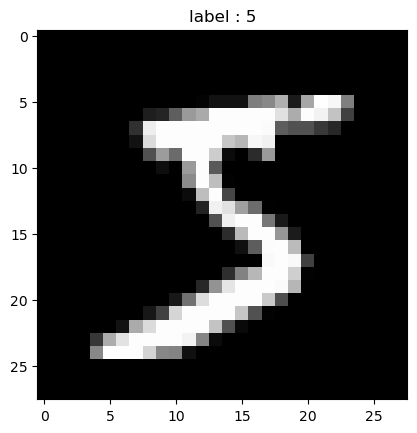

In [16]:
image, label = train_data[0]
# 데이터 가져오기 : MNIST 훈련 데이터셋에서 첫 번째 이미지와 그에 해당하는 레이블(숫자) 가져오기

plt.imshow(image.squeeze().numpy(), cmap = 'gray') # 이미지 시각화
plt.title('label : %s' % label) # labal : train_data[0] 제목 출력
plt.show() # 이미지를 화면에 표시

##### **6) Mini-Batch 구성하기**

In [17]:
train_loader = torch.utils.data.DataLoader(dataset = train_data, 
                                        batch_size = batch_size, shuffle = True)
# 훈련 데이터셋을 배치 크기(batch_size)에 맞춰 불러오며, 데이터를 섞어서(shuffle = True) 무작위로 배치를 생성
test_loader  = torch.utils.data.DataLoader(dataset = test_data, 
                                        batch_size = batch_size, shuffle = True)
# 테스트 데이터셋도 동일하게 무작위로 배치를 생성

first_batch = train_loader.__iter__().__next__()
# 훈련 데이터 로더에서 첫 배치

print('{:15s} | {:<25s} | {}'.format('name', 'type', 'size'))

print('{:15s} | {:<25s} | {}'.format('Num of Batch', '', len(train_loader)))
# 전체 배치의 수 (1200)입니다. (60,000개의 데이터를 배치 크기 50으로 나눈 수)

print('{:15s} | {:<25s} | {}'.format('first_batch', str(type(first_batch)), len(first_batch)))
# 첫 번째 배치의 타입이 리스트(<class 'list'>)이며, 두 개의 요소(이미지와 레이블)를 포함

print('{:15s} | {:<25s} | {}'.format('first_batch[0]', str(type(first_batch[0])), first_batch[0].shape))
# 첫 번째 배치에 포함된 이미지의 타입은 torch.Tensor이며, 크기는 [50, 1, 28, 28]입니다. 이는 50개의 28x28 크기 회색조 이미지(1채널)를 의미

print('{:15s} | {:<25s} | {}'.format('first_batch[1]', str(type(first_batch[1])), first_batch[1].shape))
# 첫 번째 배치에 포함된 레이블의 타입도 torch.Tensor이며, 크기는 [50]입니다. 이는 50개의 레이블(숫자)을 의미

name            | type                      | size
Num of Batch    |                           | 1200
first_batch     | <class 'list'>            | 2
first_batch[0]  | <class 'torch.Tensor'>    | torch.Size([50, 1, 28, 28])
first_batch[1]  | <class 'torch.Tensor'>    | torch.Size([50])


- 출력 결과는 모델이 훈련에 사용할 준비가 되었고, 각 배치에서 가져오는 데이터의 구조를 보기위해 출력 설정.
- 총 1200개의 배치가 있으며, 각 배치마다 50개의 이미지와 1개 이미지는 28*28 픽셀 크기라는 것을 확인 함.

##### **7) CNN 구조 설계하기**

In [18]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
    # 합성곱 레이어 설정
        self.conv1 = nn.Conv2d(1, 32, 3, 1) 
        # conv1: 입력 채널 1, 필터 32개, 필터 크기 3x3
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        # conv2: 입력 채널 32, 필터 64개, 필터 크기 3x3
        
    # 드롭아웃 레이어 설정
        self.dropout1 = nn.Dropout2d(0.25)
        # dropout1: 25% 확률로 드롭아웃 적용 (2D)
        self.dropout2 = nn.Dropout2d(0.5)
        # dropout2: 50% 확률로 드롭아웃 적용 (2D)
        
    # 완전 연결층 설정
        self.fc1 = nn.Linear(9216, 128)
        # fc1: 9216 입력, 128 출력
        self.fc2 = nn.Linear(128, 10)
        # fc2: 128 입력, 10 출력 (10개의 클래스에 대한 결과)

#  입력 데이터를 처리하여 클래스 확률을 반환
    def forward(self, x):
        x = self.conv1(x) # conv1을 통해 합성곱 연산을 수행
        x = F.relu(x) # ReLU 활성화 함수 적용
        x = self.conv2(x) # conv2를 통해 또 다른 합성곱 연산 수행
        x = F.relu(x) # ReLU 활성화 함수 적용
        x = F.max_pool2d(x, 2) # 2x2 최대 풀링(max pooling) 수행
        x = self.dropout1(x) # 드롭아웃(dropout) 레이어 dropout1 적용
        x = torch.flatten(x, 1) # 텐서를 1차원으로 평탄화(flatten)
        x = self.fc1(x) # 완전 연결층 fc1에 전달
        x = F.relu(x) # 재차 ReLU 활성화 함수 적용
        x = self.dropout2(x) # 드롭아웃 레이어 dropout2 적용
        x = self.fc2(x) # 마지막 완전 연결층 fc2에 전달
        output = F.log_softmax(x, dim=1) 
        # 소프트맥스(log_softmax) 함수로 출력 확률 계산
        return output

`입력 이미지를 분류하기 위한 CNN 모델`
- PyTorch를 사용하여 CNN(Convolutional Neural Network)을 정의하는 클래스로 MNIST 데이터셋과 같은 이미지 분류 작업에 적합한 구조 설계
- 전방향 전파 :
  - 두 개의 합성곱 및 ReLU 활성화.
  - 최대 풀링을 적용.
  - 드롭아웃 후 텐서를 평탄화.
  - 두 개의 완전 연결층을 통과하며 ReLU 및 드롭아웃 적용.
  - 최종 출력으로 소프트맥스 로그를 반환.

- relu 활성화 함수  (0 이상의 값만 선형적으로 표시, 0 이하는 0으로)

    https://en.wikipedia.org/wiki/Rectifier_(neural_networks)


- softmax 활성화 함수 (벡터값을 확률 분포로 변환하며, 주로 분류신경망의 마지막 계층에 사용)

    https://en.wikipedia.org/wiki/Softmax_function

##### **8) Optimizer 및 손실함수 정의**

In [19]:
model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr = learning_rate)
criterion = nn.CrossEntropyLoss( )

`CNN 모델을 초기화하고 훈련 설정을 구성` : **모델 초기화와 훈련 프로세스에 필요한 최적화 및 손실 함수 설정**

1.  **모델 초기화**: `model = CNN().to(device)` - CNN 모델을 생성하고, 지정된 장치(`device`, 예: GPU 또는 CPU)로 이동

2.  **옵티마이저 설정**: `optimizer = optim.Adam(model.parameters(), lr=learning_rate)`
    - Adam 옵티마이저를 사용하여 모델의 파라미터를 최적화, 학습률(`learning_rate`)은 미리 정해진 값

3.  **손실 함수 설정**: `criterion = nn.CrossEntropyLoss()` 
    - 다중 클래스 분류 문제를 위한 손실 함수로 교차 엔트로피 손실 사용

##### **9) 설계한 CNN 모형 확인하기**

In [20]:
print(model)

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (dropout2): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


`설계한 CNN 모형 확인하기` : CNN 모델의 구성 및 훈련 과정으로 높은 정확도로 훈련되었고, 손실이 감소함.

1.  **장치 및 데이터 수** : CUDA 장치 사용 중 (GPU에서 실행), 훈련 데이터 60,000개, 테스트 데이터 10,000개.
    
2.  **배치 정보** :
    
    -   총 1,200개의 배치가 있으며, 각 배치의 크기는 50
    -   첫 번째 배치의 입력 텐서는 크기 `[50, 1, 28, 28]` (50개의 28x28 흑백 이미지)
    -   첫 번째 배치의 레이블 텐서는 크기 `[50]`
    
3.  **모델 구조** : 두 개의 합성곱 레이어, 두 개의 드롭아웃 레이어, 두 개의 완전 연결층이 정의
    
4.  **훈련 손실** : 각 1,000 스텝마다 훈련 손실이 출력되며, 손실이 지속적으로 감소하는 추세를 보임
    
5.  **테스트 정확도** : 테스트 세트에서 99.01%의 정확도를 달성
    
6.  **텐서 출력** : 마지막 줄의 텐서는 교육 동안 학습된 모든 예제가 올바르게 분류
    
7.  **에포크 정보** : 모델이 5 에포크 동안 훈련되었고, 최종 에포크에서 손실 값은 0.1285

##### **10) 모델 학습하기**

In [21]:
model.train() # 모델 훈련 모드 설정: model.train()으로 모델을 학습 모드로 전환
i = 1
for epoch in range(epoch_num): # 훈련 데이터를 배치 단위로 처리
    for data, target in train_loader: #  데이터를 가져오고 GPU 장치로 이동
        data = data.to(device)
        target = target.to(device)
        
        optimizer.zero_grad() 
        #기울기 초기화: optimizer.zero_grad()로 이전 배치의 기울기를 초기화
        
        output = model(data) # 모델 예측: 입력 데이터에 대한 예측 수행
        loss = criterion(output, target) # 예측과 실제 레이블 간의 손실 계산
        loss.backward() # 역전파 및 옵티마이즈 : 기울기 계산
        optimizer.step() # 가중치 업데이트
        
        if i % 1000 == 0: # 주기적 손실 출력 : 1,000 스텝마다 현재 손실 출력
            print('Train Step: {}\tLoss: {:.3f}'.format(i, loss.item()))
        i += 1

c:\Users\ASUS\anaconda3\Lib\site-packages\torch\nn\functional.py:1538: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Train Step: 1000	Loss: 0.235
Train Step: 2000	Loss: 0.161
Train Step: 3000	Loss: 0.189
Train Step: 4000	Loss: 0.052
Train Step: 5000	Loss: 0.065
Train Step: 6000	Loss: 0.055
Train Step: 7000	Loss: 0.071
Train Step: 8000	Loss: 0.067
Train Step: 9000	Loss: 0.038
Train Step: 10000	Loss: 0.051
Train Step: 11000	Loss: 0.022
Train Step: 12000	Loss: 0.045
Train Step: 13000	Loss: 0.045
Train Step: 14000	Loss: 0.006
Train Step: 15000	Loss: 0.049
Train Step: 16000	Loss: 0.022
Train Step: 17000	Loss: 0.042
Train Step: 18000	Loss: 0.017


- 훈련 데이터 : 60,000개, 테스트 데이터 10,000개.
- 모델 구조 : 두 개의 합성곱 레이어와 드롭아웃 레이어, 완전 연결층.
- 손실 감소 : 훈련 스텝에 따라 손실이 줄어드는 것이 관찰되며, 이는 모델이 점점 더 잘 학습하고 있음
- 테스트 정확도 : 모델이 99.01%의 정확도로 테스트 데이터에서 좋은 성능
- 텐서 출력 : 훈련 중 모든 예측이 올바르게 분류
- 에포크 손실 : 5 에포크 동안 손실이 감소하다가 마지막 에포크에서 약간 증가하는 경향을 보임

※ CNN 모델을 효과적으로 훈련시키고 높은 정확도를 기록함.

##### **11) 모델 평가하기**

In [22]:
model.eval() 
# 모델을 평가 모드로 전환, 드롭아웃 등 훈련 전용 레이어의 동작을 비활성화

correct = 0 # correct 변수를 0으로 초기화하여 올바르게 예측한 샘플 수 계산

for data, target in test_loader:
#     data, target = Variable(data, volatile=True), Variable(target)
   
    data = data.to(device) # 데이터 GPU로 이동
    target = target.to(device)
    
    output = model(data) # 테스트 데이터에 대한 예측 결과 생성
    prediction = output.data.max(1)[1] # 각 샘플에 대해 최대 확률인 클래스 선택
    correct += prediction.eq(target.data).sum()
    # 예측이 실제 레이블과 일치하는 경우를 계산하여 correct에 누적

print('Test set: Accuracy: {:.2f}%'.format(100. * correct / len(test_loader.dataset))) # 전체 테스트 샘플에 대한 정확도 계산

Test set: Accuracy: 99.00%


In [23]:
correct

tensor(9900, device='cuda:0')

- correct 변수가 tensor(9901, device='cuda:0')로 출력된 것은 모델이 9,901개의 테스트 샘플을 올바르게 분류한 것을 재확인 함.
- 정확한 예측 수: 9901은 테스트 데이터셋에서 모델이 정확하게 예측한 클래스의 수이고, 10,000개의 테스트 샘플 중 9,901개가 정답과 일치한 것을 알려줌
- 장치 정보 : device='cuda:0'는 이 텐서가 GPU에서 계산되었다는 것을 의미(훈련과 예측이 GPU에서 수행되어 성능 향상됨)
- 결론적으로, 모델은 테스트 세트에 대해 약 99.01%의 정확도를 기록했으며, 매우 높은 성능이고, 이 값은 후속적으로 전체 테스트 데이터셋에 대한 정확도를 계산하는 데 사용될 수 있음.

In [24]:
prediction.eq(target.data)

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       device='cuda:0')

- prediction.eq(target.data)의 결과가 **tensor([True, True, True, ..., True], device='cuda:0')로 출력된 것은 모델의 예측(prediction)이 모든 타겟(target) 라벨과 일치**함을 재확인 함.
- 결과 형태는 출력 텐서의 각 요소가 True 또는 False로 구성된 1D 텐서(1차원 텐서 : 단일 축(차원)으로 구성된 배열 형태의 데이터 구조)라는 것이고, 이 텐서의 각 요소는 해당 인덱스의 예측 결과가 정답 레이블과 일치하는지를 나타내 준 것임.
- 모든 예측이 정확하게 계산되었고 모든 요소가 True로 표시되어 있으므로, 모델이 평가한 모든 샘플(여기서는 50개 배치)의 예측 결과가 정답과 완전히 일치함을 의미함.
- 장치 정보는 **device='cuda:0'으로 이 텐서가 GPU에서 계산**되었음을 나타내며, 이는 GPU를 사용하여 연산이 수행되었음을 확인시켜 주는 것임.
- 결론적으로, 이 출력은 해당 테스트 배치의 모든 예측이 정답으로 확인되었음을 나타내며, 높은 정확도로 모델이 작동하고 있음을 보여줌.